In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.read_csv("pb_gaussian_var.csv")

In [2]:
list_of_n = df.n.unique()
print(list_of_n)
estimates_std = []
standard_error = []

for n_val in list_of_n:
    estimates_std.append(np.std(df.loc[df.n==n_val, :]['estimator_mean']))
    standard_error.append(np.mean(df.loc[df.n==n_val, :]['estimator_variance']))

[ 250  500  750 1000 2500]


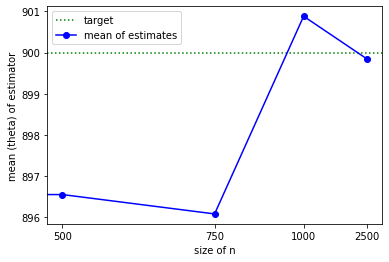

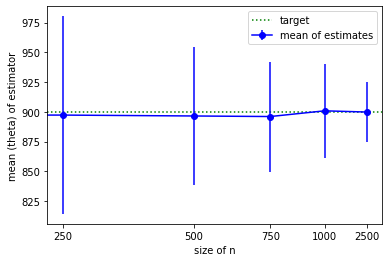

In [3]:
true_mean = 190
true_sd = 30
true_var = true_sd**2

point_estimates = []
for n_val in list_of_n:
    point_estimates.append(np.mean(df.loc[df.n==n_val, :]['estimator_mean']))
    
plt.xscale('log')
plt.axhline(y=true_var, color='green', linestyle=':', label = 'target')
plt.plot([str(e) for e in list_of_n], point_estimates, 
     marker='o', color='blue', label='mean of estimates')
plt.xlabel("size of n")
plt.ylabel("mean (theta) of estimator")
plt.legend()
plt.show()

#plot is cutting off first datapoint. Hardcoding the first "throwaway" datapoint
list_of_n_new = list_of_n.copy()
list_of_n_new=np.insert(list_of_n_new,0,0)

point_estimates_new = point_estimates.copy()
point_estimates_new.insert(0,900)
estimates_std_new = estimates_std.copy()
estimates_std_new.insert(0,0)

plt.xscale('log')
plt.axhline(y=true_var, color='green', linestyle=':', label = 'target')
plt.errorbar([str(e) for e in list_of_n_new], point_estimates_new, 
     marker='o', color='blue', label='mean of estimates', yerr=estimates_std_new)
plt.xlabel("size of n")
plt.ylabel("mean (theta) of estimator")
plt.legend()
plt.show()

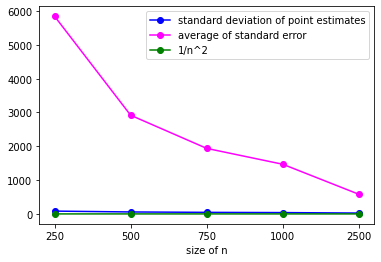

In [6]:
plt.plot([str(e) for e in list_of_n], estimates_std, 
         marker='o', color='blue', label='standard deviation of point estimates')
plt.plot([str(e) for e in list_of_n], standard_error, 
         marker='o', color='magenta', label='average of standard error')
plt.plot([str(e) for e in list_of_n], [(1/(np.sqrt(e))) for e in list_of_n], 
         marker='o', color='green', label='1/n^2')
plt.xlabel("size of n")
plt.legend()
plt.show()

In [9]:
def construct_ci(alpha):

    ci_success_over_n = []
    ci_success_sd = []

    true_theta = 900


    index = 0
    for n_val in list_of_n:
        ci_success_trials = np.zeros(1000) #T
        for i in range(1000):
            theta = (df.loc[df.n==n_val, :]['estimator_mean'])[index]
            sigma_sq = (df.loc[df.n==n_val, :]['estimator_variance'])[index]
            index += 1        

            ci = st.norm.interval(alpha, loc=theta, scale=np.sqrt(sigma_sq))
            if ci[0] <= true_theta <= ci[1]:
                ci_success_trials[i] = 1
        ci_success_over_n.append(np.mean(ci_success_trials))
        ci_success_sd.append(np.std(ci_success_trials))
        
        
#     plt.xscale('log')
    plt.axhline(y=alpha, color='green', linestyle=':', label = 'target')
    plt.errorbar([str(e) for e in list_of_n], ci_success_over_n, 
                 marker='o', color='blue', label='CI success rate', yerr=ci_success_sd)
    plt.xlabel("size of n")
    plt.ylabel("alpha")
    plt.legend()
    plt.show()

    return(ci_success_over_n, ci_success_sd)

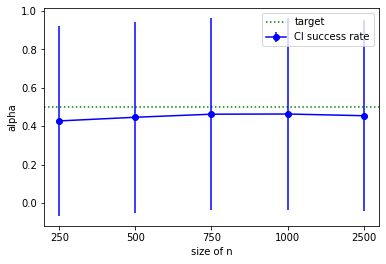

([0.428, 0.447, 0.463, 0.464, 0.455], [0.49478884385159694, 0.4971830648765101, 0.49862912068991716, 0.4987023160162784, 0.49797088268291345])


In [10]:
print(construct_ci(.50))

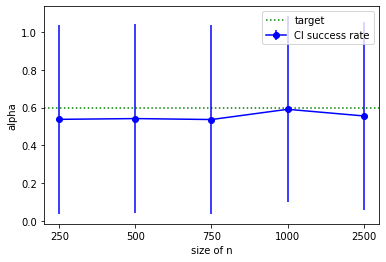

([0.538, 0.542, 0.537, 0.591, 0.556], [0.4985539088203, 0.49823287727728277, 0.49862912068991716, 0.4916492652287807, 0.4968541033341679])


In [11]:
print(construct_ci(.60))

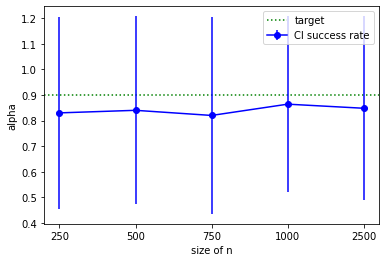

([0.83, 0.84, 0.82, 0.864, 0.848], [0.375632799419859, 0.36660605559646725, 0.38418745424597084, 0.34278856457005674, 0.35902089075707005])


In [12]:
print(construct_ci(.90))